In [1]:
from PIL import Image
import numpy as np
import cv2
import pytesseract

In [2]:
# with Image.open('datasets/scoreboards/_001.png') as im:
#     boxes = (920, 230, 950, 260), (980, 230, 1010, 260)
    
#     im_crops = []
#     for box in boxes:
#         im_crop = im.crop(box)
#         im_crop.show()
#         im_crops.append(im_crop)

#     for im_crop in im_crops:
#         for psm in range(14):
#             for oem in range(4):
#                     config = fr'outputbase digits --psm {psm} --oem {oem}'
#                     try:
#                         print(config)
#                         print(pytesseract.image_to_string(im_crop, config=config))
#                     except Exception as e:
#                         pass

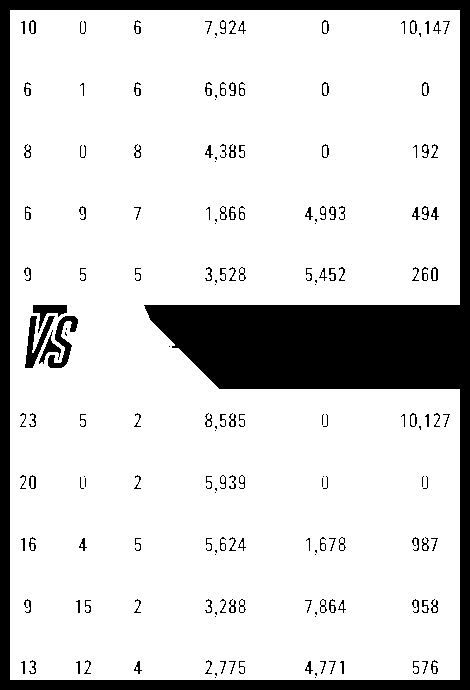

--psm 0 --oem 0 digits
--psm 0 --oem 1 digits
--psm 0 --oem 2 digits
--psm 0 --oem 3 digits
--psm 1 --oem 0 digits
--psm 1 --oem 1 digits
 

--psm 1 --oem 2 digits
--psm 1 --oem 3 digits
 

--psm 2 --oem 0 digits
--psm 2 --oem 1 digits
--psm 2 --oem 2 digits
--psm 2 --oem 3 digits
--psm 3 --oem 0 digits
--psm 3 --oem 1 digits
 

--psm 3 --oem 2 digits
--psm 3 --oem 3 digits
 

--psm 4 --oem 0 digits
--psm 4 --oem 1 digits
 

--psm 4 --oem 2 digits
--psm 4 --oem 3 digits
 

--psm 5 --oem 0 digits
--psm 5 --oem 1 digits
5 5 2
5.8 558
5 2 5 8
3

23
-

2 28
222 22
2226 288
22828 22888
6
2 - 2 7
-8 22

--psm 5 --oem 2 digits
--psm 5 --oem 3 digits
5 5 2
5.8 558
5 2 5 8
3

23
-

2 28
222 22
2226 288
22828 22888
6
2 - 2 7
-8 22

--psm 6 --oem 0 digits
--psm 6 --oem 1 digits
10 0 6 7924 0 10.147
6 1 6 6.696 0 0

8 0 8 4.385 0 192
6 9 7 1866 4.993 494
9 5 5 3.628 5.452 260
23 5 2 8.585 1 10.127
20 2 5.939 1
16 4 5 5.624 1678 987
9 15 2 3.288 7864 958
13 12 4 2775 4771 576

--psm 6 --oe

In [84]:
with Image.open('datasets/scoreboards/_001.png') as im:
    box = (920, 230, 1370, 900)
    im_crop = im.crop(box)
    a = np.asarray(im_crop)
    a = cv2.bitwise_not(a)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    _, a = cv2.threshold(a, 93, 255, cv2.THRESH_BINARY)
    a = cv2.dilate(a, np.ones((2, 2)))
    a = cv2.copyMakeBorder(a, 10, 10, 10, 10, cv2.BORDER_CONSTANT)
    im_crop = Image.fromarray(a)
    im_crop.show()

    for psm in range(14):
        for oem in range(4):
            config = fr'--psm {psm} --oem {oem} digits'
            try:
                print(config)
                print(pytesseract.image_to_string(im_crop, config=config))
            except Exception as e:
                pass